In [149]:
# Gareth Walker, 2024

In [150]:
import pandas as pd 
import numpy as np

file='../Results/ohRisingFallingInfo.csv'

# create a new dataframe  
df = pd.read_csv(file)
df = df.replace({"--undefined--":0})

df_orig=df.copy()

print(df)

# where to save any image files
plotDir="../Plots/"

             token  call spkr    spkrBase     spkrMid     spkrTop  \
0    0638-B-269-74   638    B  145.786384  205.945725  551.594019   
1    4065-A-552-11  4065    A  132.364963  204.379823  580.576690   
2    4065-A-678-82  4065    A  132.364963  204.379823  580.576690   
3    4065-B-856-32  4065    B   83.925190  122.618539  359.576484   
4    4065-B-952-42  4065    B   83.925190  122.618539  359.576484   
..             ...   ...  ...         ...         ...         ...   
86   6467-A-596-73  6467    A  146.080163  218.985670  626.659914   
87  6521-A-1300-39  6521    A   82.445776  125.568579  491.913549   
88  6521-A-1302-58  6521    A   82.445776  125.568579  491.913549   
89  6521-B-1216-45  6521    B  148.181192  229.811060  681.546369   
90  6521-B-1219-02  6521    B  148.181192  229.811060  681.546369   

    firstVoicedFrameTime  lastVoicedFrameTime  duration   timingS  ...  \
0               0.040549             0.210318  0.169769  7.575758  ...   
1               0.00902

In [151]:
# a list of all the relevant variables
sp_var_fullset = ['duration',
                  'timingS',
                  'timingP',
                  'timingE',
                  'heightS',
                  'heightP',
                  'heightE',
                  'heightSreBaseline',
                  'heightPreBaseline',
                  'heightEreBaseline',
                  'heightSreMid',
                  'heightPreMid',
                  'heightEreMid',
                  'averagereBaseline',
                  'averagereMid',
                  'riseST',
                  'fallST',
                  'spanST',
]

sp_var = sp_var_fullset.copy()

# uncomment any variables you want to remove (e.g. because there are strong correlations)
#sp_var.remove('duration')
sp_var.remove('timingS')
#sp_var.remove('timingP')
sp_var.remove('timingE')
sp_var.remove('heightS')
sp_var.remove('heightP')
sp_var.remove('heightE')
sp_var.remove('heightSreBaseline')
sp_var.remove('heightPreBaseline')
sp_var.remove('heightEreBaseline')
sp_var.remove('heightSreMid')
sp_var.remove('heightPreMid')
sp_var.remove('heightEreMid')
sp_var.remove('averagereBaseline')
#sp_var.remove('averagereMid')
#sp_var.remove('riseST')
#sp_var.remove('fallST')
sp_var.remove('spanST')

In [152]:
# Checking normal distribution (Shapiro Wilk)

#from scipy.stats import shapiro
from scipy import stats

print("Normality comparisons (Shapiro Wilk)\n")

table_df = pd.DataFrame(columns=["variable", "W", "P"]) 

sw_spvar=sp_var_fullset.copy()

for column in sw_spvar:
    all = df[column].astype(float)

    res=stats.shapiro(all)
    res_w='%.3f' % res.statistic
    if res.pvalue > .01:
        res_p='%.3f' % res.pvalue
    elif res.pvalue < .01 and res.pvalue > .001:
        all_res_p='%.3f' % res.pvalue
    elif res.pvalue < .001:
        res_p='<.001'

    res_p = res_p.lstrip("0")
        
    res=[column, res_w, res_p]

    table_df.loc[len(table_df)] = res

print(table_df)

print()

# prepare LaTeX version
# rename columns
table_df = table_df.rename(columns={'variable': 'Variable', 'W': '$W$', 'P': '$p$'})
# caption
caption=""
label=""

latex = table_df.style.hide(axis="index").format(precision=2).to_latex(position_float='centering',
                                                                  #column_format='rrr',
                                                                  position="H",
                                                                  caption=caption,
                                                                  siunitx=True,
                                                                  label=label,
                                                                  hrules=True,
                                                                  )

print(latex)

Normality comparisons (Shapiro Wilk)

             variable      W      P
0            duration  0.903  <.001
1             timingS  0.751  <.001
2             timingP  0.980   .190
3             timingE  0.684  <.001
4             heightS  0.957  <.001
5             heightP  0.924  <.001
6             heightE  0.950  <.001
7   heightSreBaseline  0.968   .026
8   heightPreBaseline  0.981   .204
9   heightEreBaseline  0.957   .204
10       heightSreMid  0.970   .037
11       heightPreMid  0.984   .316
12       heightEreMid  0.964   .012
13  averagereBaseline  0.985   .359
14       averagereMid  0.992   .858
15             riseST  0.943  <.001
16             fallST  0.986   .443
17             spanST  0.990   .693

\begin{table}[H]
\centering
\begin{tabular}{lll}
\toprule
{Variable} & {$W$} & {$p$} \\
\midrule
duration & 0.903 & <.001 \\
timingS & 0.751 & <.001 \\
timingP & 0.980 & .190 \\
timingE & 0.684 & <.001 \\
heightS & 0.957 & <.001 \\
heightP & 0.924 & <.001 \\
heightE & 0.950 & 

In [153]:
# get the correlations for all the pairs of variables

from scipy import stats

# get all the possible combinations
import itertools
combinations=list(itertools.combinations(sp_var_fullset, 2))

# function for getting r and p-value
def get_corr(one,two):
    # convert dataframe into series
    new_one = df[one]
    new_two = df[two]
    
    # Spearman correlation coefficient because values on some 
    # variables are not normally distributed 
    corr = stats.spearmanr(new_one,new_two).statistic
    pvalue = stats.spearmanr(new_one,new_two).pvalue
    
    if pvalue < 0.001:
        pvalue = "<.001"
    else:
        pvalue = '%.3f' % pvalue
    pvalue = pvalue.lstrip("0")
    print(one, " vs. ", two, ": ρ = %.3f" % corr, ", p = ", pvalue, sep="")

def get_corrs():
    num = len(df.index) # number of rows in dataframe, as a check
    print("n = ", num, "\n", sep='')
    for combination in combinations:
        first = combination[0]
        second = combination[1]
        get_corr(first,second)
    
get_corrs()


n = 91

duration vs. timingS: ρ = -0.308, p = .003
duration vs. timingP: ρ = -0.288, p = .006
duration vs. timingE: ρ = 0.036, p = .736
duration vs. heightS: ρ = 0.185, p = .078
duration vs. heightP: ρ = 0.265, p = .011
duration vs. heightE: ρ = -0.020, p = .853
duration vs. heightSreBaseline: ρ = 0.027, p = .800
duration vs. heightPreBaseline: ρ = 0.113, p = .288
duration vs. heightEreBaseline: ρ = -0.343, p = <.001
duration vs. heightSreMid: ρ = -0.026, p = .809
duration vs. heightPreMid: ρ = 0.079, p = .455
duration vs. heightEreMid: ρ = -0.397, p = <.001
duration vs. averagereBaseline: ρ = -0.077, p = .467
duration vs. averagereMid: ρ = -0.122, p = .249
duration vs. riseST: ρ = 0.156, p = .139
duration vs. fallST: ρ = 0.245, p = .019
duration vs. spanST: ρ = 0.198, p = .060
timingS vs. timingP: ρ = 0.366, p = <.001
timingS vs. timingE: ρ = 0.011, p = .917
timingS vs. heightS: ρ = -0.083, p = .435
timingS vs. heightP: ρ = -0.178, p = .092
timingS vs. heightE: ρ = 0.037, p = .726
tim

              duration   timingP averagereMid      rise      fall
duration        1.0***  -0.288**       -0.122     0.156    0.245*
timingP       -0.288**    1.0***        0.015  0.439***   -0.224*
averagereMid    -0.122     0.015       1.0***    0.234*  0.618***
rise             0.156  0.439***       0.234*    1.0***  0.418***
fall            0.245*   -0.224*     0.618***  0.418***    1.0***


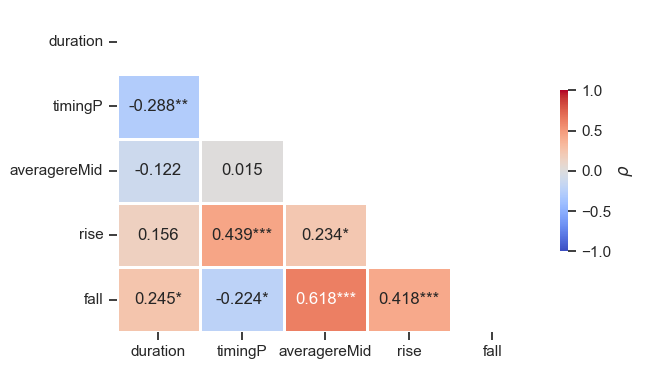

In [154]:
# calculating a correlation matrix with pandas

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# aesthetics: https://seaborn.pydata.org/tutorial/aesthetics.html
sns.set(rc={"figure.figsize":(2.5, 5)}) # width, height
sns.set_style("ticks")
plt.rcParams.update({'font.size': 12})

# dataframe for correlations
mat_df = df.loc[:, sp_var] 

# rename a couple of variables, for presentation purposes
mat_df.rename(columns = {'riseST':'rise'}, inplace = True) 
mat_df.rename(columns = {'fallST':'fall'}, inplace = True) 

def corr_sig(df=None):
    p_matrix = np.zeros(shape=(mat_df.shape[1],mat_df.shape[1]))
    for col in mat_df.columns:
        for col2 in mat_df.drop(col,axis=1).columns:
            #_ , p = stats.pearsonr(mat_df[col],df[col2])
            _ , p = stats.spearmanr(mat_df[col],df[col2])
            p_matrix[mat_df.columns.to_list().index(col),mat_df.columns.to_list().index(col2)] = p
    return p_matrix

def plot_cor_matrix(corr, mask=None):
    f, ax = plt.subplots(figsize=(6, 4))
    sns.heatmap(corr, 
                ax=ax,
                mask=mask,
                # cosmetics
                annot=corr_rnd, # the dataframe to use for labelling the boxes in the matrix
                fmt='',
                vmin=-1, 
                vmax=1, 
                center=0,
                cmap='coolwarm', 
                linewidths=1,
                #cbar_kws={'orientation': 'horizontal'},
                cbar_kws={"shrink": 0.5, 'label': '$ρ$'},
               )

# plot without significance filter
corr = mat_df.corr(method="spearman") # get the correlations
corr_rnd=corr.copy().round(decimals=3) # copy the correlations to a new dataframe and round to 3dp 

p_values = corr_sig(mat_df) # get the p-values
# make a dataframe of p-values, copying the column labels and index from the correlation dataframe
p_values = pd.DataFrame(data=p_values.T)
p_values = pd.DataFrame(data=p_values.values, columns=corr.columns, index=corr.index)

# add an asterisk depending on the values of the p-values dataframe; see https://stackoverflow.com/a/66747744/7370748
corr_rnd = corr_rnd.mask((p_values < .05), corr_rnd.astype(str) + '*') 
corr_rnd = corr_rnd.mask((p_values < .01), corr_rnd.astype(str) + '*') # add another asterisk for <0.01
corr_rnd = corr_rnd.mask((p_values < .001), corr_rnd.astype(str) + '*') # add another asterisk for <0.001
corr_rnd = corr_rnd.mask((p_values > .05), corr_rnd.astype(str) + '') # add nothing; helps with printing to a LaTeX table later

new = corr_rnd.copy()

print(new)

# LaTeX version
caption="Spearman's rank correlation coefficient; *** where \\textit{p}~<~.001, ** where \\textit{p}~<~.01, * where \\textit{p}~<~.05. Sample: 91~tokens of stand-alone `oh' with rising-falling pitch in Callhome"
label="tab:corr"
latex = corr_rnd.style.to_latex(position_float='centering',
                                position="H",
                                column_format="lSSSSS", # manually specify column format to align by decimal point
                                caption=caption,
                                siunitx=True,
                                label=label,
                                hrules=True,
                                )

print(latex, file=open("../LaTeX/corr.tex", 'w'))

mask = np.triu(corr)
plot_cor_matrix(corr,mask)

# margins
plt.subplots_adjust(left=0.13, right=1, top=0.98, bottom=0.175)

# save a version as an image file
plt.savefig(plotDir + "correlations.png", format="png", dpi=300, bbox_inches='tight')

plt.show()

In [155]:
%%bash

# tidy up the LaTeX table created above (remove duplicate comparisons, and variables being compared against themselves)
f=../LaTeX/corr.tex 
vars=("duration" "timingP" "averagereMid" "rise" "fall")
e=1
for v in "${vars[@]}"
do
    l=$(grep ^$v "$f" | cut -d'&' -f 1-$e)
    sed -i "/^$v/c\\$l\\\\\\" $f
    e=$(($e + 1))
done

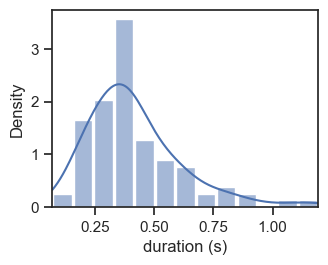

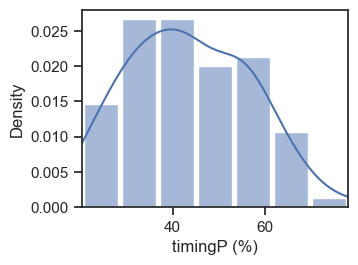

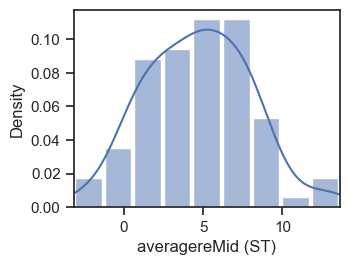

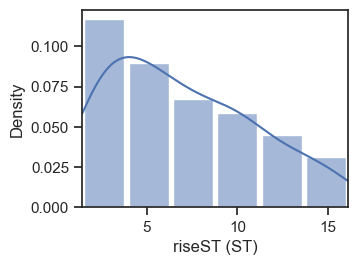

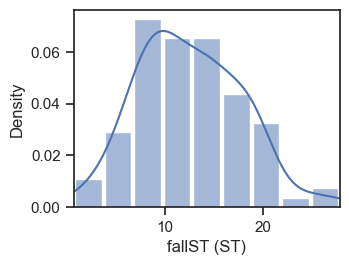

In [156]:
import seaborn as sns 
import matplotlib.pyplot as plt
import math

df=df_orig.copy()

# aesthetics: https://seaborn.pydata.org/tutorial/aesthetics.html
sns.set(rc={"figure.figsize":(3.5, 2.5)}) # width, height
sns.set_style("ticks")
plt.rcParams.update({'font.size': 10})

# plots the groups against each other on each variable
for column in sp_var:    

    # calculating the number of bins on the basis of the whole dataframe
    # see https://en.wikipedia.org/wiki/Histogram#Number_of_bins_and_width
    n = len(df)
    min = df[column].min()
    max = df[column].max()
    q3, q1 = np.percentile(df[column], [75,25])

    # Freedman-Diaconis rule: 
    bins = math.ceil((max-min)/(2*((q3 - q1)/(n**(1./3)))))

    # Sturges' formula
    #bins = math.ceil(math.log2(n))+1

    # arbitrary number of bins
    #bins=15
    
    # the same number of bins in all plots, spread evenly between min and max 
    bins = np.histogram_bin_edges(df[column], bins=bins)
    
    # method for plotting; options include "bars", "step", "poly"
    element="bars"
    
    # to add units to y axis labels
    if column == 'duration':
        unit='(s)'
    elif column == 'timingP':
        unit='(%)'
    elif column == 'averagereMid':
        unit='(ST)'
    elif column == 'riseST':
        unit='(ST)'
    elif column == 'fallST':
        unit='(ST)'

    itcolumn='$\it{' + column + '}$'
    
    # histogram with density curve

    fig, ax = plt.subplots()
    # https://seaborn.pydata.org/generated/seaborn.histplot.html
    ax.set_xlim(min,max)
    ax.set_xlabel(column + ' ' + unit) # 'itcolumn' if you want to italicise the variable name; otherwise 'column'
    sns.histplot(df[column], kde=True, bins=bins, stat='density', shrink=0.9, ax=ax, element=element)
    #sns.rugplot(df[column], ax=ax)

    left  = 0.21  # the left side of the subplots of the figure
    right = 0.97    # the right side of the subplots of the figure
    bottom = 0.2   # the bottom of the subplots of the figure
    top = .99      # the top of the subplots of the figure
    wspace = 0.2   # the amount of width reserved for blank space between subplots
    hspace = 0.2   # the amount of height reserved for white space between subplots
    
    plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)
    plt.savefig(plotDir + column + "HistDens.png", format="png", dpi=600)
    plt.show()

In [157]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [158]:
%%R

rm() # resets variables
library("caseMatch")

library('varhandle') # for resetting variables

# how many cases to compare (2 = return pairs, 3 = return groups of 3 etc.)
c = 2

# how many comparisons to look at to determine which are the most typical cases 
m = 100
m_orig = m # for use later on

# how many cases to return as most typical
t = 5

# how many cases to return as least typical
l = 5

# file containing data
df <- read.csv("../Results/ohRisingFallingInfo.csv",
               stringsAsFactors = F,
               head = T, 
               )

# which variables to look at
mvars <- c("duration","timingP","averagereMid","riseST","fallST")

# which variables to exclude
dropvars <- c("token","call","spkr",
              "spkrBase","spkrMid","spkrTop",
              "firstVoicedFrameTime","lastVoicedFrameTime",
              #"duration",
              "timingS",
              #"timingP",
              "timingE",
              "heightS","heightP","heightE",
              "heightSreBaseline","heightPreBaseline","heightEreBaseline",
              "heightSreMid","heightPreMid","heightEreMid",
              "averagereBaseline",
              #"averagereMid",
              #"riseST",
              #"fallST",
              "spanST")

In [159]:
%%R

# function for identifying cases

makeout <- function(n, mc=NULL) { # n is design.type: "most similar", or "most different" ;
                                  # mc is the case to compare with
    out <- case.match(data=df,
                  id.var="token", 
                  leaveout.vars=dropvars,
                  distance="mahalanobis",
                  design.type=n,
                  greedy.match="all",
                  case.N=c,
                  number.of.matches.to.return=m,
                  match.case=mc
                 )
   
    # create a dataframe of matches, dropping the first column (distances)
    out.df <<- data.frame(out$cases[,-1])
    
    # count each time unique entries appear in the table
    out.count <- table(unlist(out.df))
    # sort the table of unique entries into descending order
    out.count <- out.count[order(out.count, decreasing=TRUE)]
    # make table into dataframe
    out.count.df <<- as.data.frame(out.count)
    
    # get all rows of out.count.df where value of N is out.count.table.tval or higher
    # (the number of matches may be higher than t, the number of typical cases sought
    # as the instance in t+1, t+2 etc. might have the same number of matches as the case 
    # in row t)
    out.count.df.tval <<- out.count.df[t,"Freq"]
    out.count.df.sel <<- out.count.df[out.count.df$"Freq" >= out.count.df.tval, ]
    # get cases as a list
    list.most <<- list(out.count.df.sel$Var1)
    
    # get the two most frequent entries, to check later that they aren't the same
    out.count.top <- head(out.count, 2)
    out.count.top.df <- as.data.frame(out.count.top)    
    outFirst <<- out.count.top.df[1,2]
    outSecond <<- out.count.top.df[2,2]
    outFirstName <<- out.count.top.df[1,1]
    
    # create a dataframe of matches, dropping the second column (name of first in comparison)
    out.df.dist <<- data.frame(out$cases[,-2])
    
    out.df.nodist <<- data.frame(out.df.dist[,-1])

}

In [160]:
%%R
# a function to suppress output from functions

shut_up = function(expr) {
  # temp file
  f = file()
  # write output to that file
  sink(file = f)
  # evaluate expr in original environment
  y = eval(expr, envir = parent.frame())
  # close sink
  sink()
  # get rid of file
  close(f)
}

In [161]:
%%R
## prototypical case 

shut_up(makeout(n="most similar"))
# repeat the function, increasing the number of matches, until there is one most frequently occurring case
while (outFirst==outSecond) {
    m <- m + 1
    shut_up(makeout(n="most similar"))
} 

cat(paste0("Matching variables: ", paste(unlist(mvars),collapse=", "), paste("\n\n")))
cat(paste0("Number of cases being compared: ", paste(c), paste("\n\n")))
cat(paste0("Number of matches initially sought: ", paste(m_orig), paste("\n\n")))
cat(paste0("Number of matches required to get a single leader (= prototypical case), m: ", 
           paste(m), paste("\n\n")))
cat(paste0("Prototypical case, p:"), paste(outFirstName), paste("(appears in"), paste(outFirst), 
    paste("matches)", paste("\n\n")))

############

# most typical cases

# which variables to keep (from the varhandles package)
rm.all.but(c("df", "c", "t", "l", "mvars", "dropvars", "m_orig", "outFirstName"))
m=m_orig

mc=outFirstName
shut_up(makeout(n="most similar", mc=mc))

# get the t cases which are the most similar to prototypical case (= closest):
cat(paste0("Table of shortest distances from prototypical case (= most typical cases; number of most typical cases sought, t = ", t, "):\n\n"))
most_typical=head(out.df.dist, t)
print(most_typical)
cat("\n")
 
# create a list of the most similar cases, without duplicates
typical.list <- as.list(head(out.df.nodist,t))
typical.list.combined <- unlist(typical.list, recursive = FALSE, use.names=FALSE)
typical.list.combined <- unique(typical.list.combined)
typical.list.combined <- list(typical.list.combined)

if (c>2) {
  add=" but you are matching more than two cases at a time and there may have been duplicates so the number of cases returned may be different): "
} else if (c==2) {
  add="): "
}

typ <- lapply(typical.list.combined, toString)

cat(paste0("Most typical cases as a list (number sought was "), paste(t), paste(add), 
    paste(typ), paste("\n\n"), sep="")


############

# least typical cases

# which variables to keep (from the varhandles package)
rm.all.but(c("df", "c", "t", "l", "mvars", "dropvars", "m_orig", "outFirstName", "most_typical"))
m=m_orig

mc=outFirstName
shut_up(makeout(n="most different", mc=mc))

# get the t cases which are the most distant compared to prototypical case (= furthest away):
cat(paste0("Table of longest distances from prototypical case (= least typical cases; number of least typical cases sought, l = ", l, "):\n\n"))
least_typical=head(out.df.dist, l)
print(least_typical)

cat("\n")

# create a list of the most distant cases, without duplicates
extreme.list <- as.list(head(out.df.nodist,l))
extreme.list.combined <- unlist(extreme.list, recursive = FALSE, use.names=FALSE)
extreme.list.combined <- unique(extreme.list.combined)
extreme.list.combined <- list(extreme.list.combined)

if (c>2) {
  add=" but you are matching more than two cases at a time and there may have been duplicates so the number of cases returned may be different): "
} else if (c==2) {
  add="): "
}

ext <- lapply(extreme.list.combined, toString)

cat(paste0("Least typical cases as a list (number sought was "), paste(l), paste(add), 
    paste(ext), paste("\n\n"), sep="")

#########

# new dataframe for ranking
rank <- out.df.dist
# get the name of the prototypical case
pt=as.character(outFirstName)
# add the prototypical case to the dataframe, with a distance of 0 (meaning identical)
rank[nrow(rank) + 1,] = c(0,pt)
# reverse the ranking to start with most typical, down to least typical
rank <- rank[seq(dim(rank)[1],1),]
# renumber, starting from 0
rownames(rank) <- 1:nrow(rank)-1

# save as CSV file
write.csv(rank, "../Results/similarityRanking.csv", row.names=TRUE)

############

#rm() # resets variables


Matching variables: duration, timingP, averagereMid, riseST, fallST

Number of cases being compared: 2

Number of matches initially sought: 100

Number of matches required to get a single leader (= prototypical case), m: 100

Prototypical case, p: 4822-B-1198-13 (appears in 8 matches) 

Table of shortest distances from prototypical case (= most typical cases; number of most typical cases sought, t = 5):

  distances      unit.id.2
1 0.3804614  6161-A-674-26
2 0.4130453  4666-B-359-97
3 0.6561507  4666-B-166-31
4 0.6997235 5736-B-1084-57
5 0.8732576  6252-A-626-32

Most typical cases as a list (number sought was 5): 6161-A-674-26, 4666-B-359-97, 4666-B-166-31, 5736-B-1084-57, 6252-A-626-32

Table of longest distances from prototypical case (= least typical cases; number of least typical cases sought, l = 5):

   distances      unit.id.2
90  22.66191  6252-A-446-66
89  20.06140  5208-A-259-56
88  17.02465 4544-B-1231-92
87  16.62456  4822-B-968-31
86  15.76211  5551-B-826-02

Least typic

In [162]:
%%R
library("xtable")

colnames(most_typical) <- c("Distance", "Token")
colnames(least_typical) <- c("Distance", "Token")

most_typ <- xtable(most_typical, caption="Most typical cases (shortest distances from prototypical case)",include.rownames=FALSE,label="tab:mt")
least_typ <- xtable(least_typical, caption="Least typical cases (longest distances from prototypical case)",include.rownames=FALSE,label="tab:lt")

print(most_typ,file="../LaTeX/mostTyp.tex",table.placement="H")
print(least_typ,file="../LaTeX/leastTyp.tex",table.placement="H")

In [163]:
%%bash
# go through all the files in the LaTeX directory, and if they were
# made in R, replace \hline commands with commands from booktabs
for f in ../LaTeX/*;
do
    if grep -q "latex table generated in R" "$f"; then
	# replace the lines
	sed -i ':a;N;$!ba;s/\\hline/\\toprule/1' $f
	sed -i ':a;N;$!ba;s/\\hline/\\midrule/1' $f
	sed -i ':a;N;$!ba;s/\\hline/\\bottomrule/1' $f	
    fi
done

In [164]:
# copy the original dataframe
df=df_orig.copy()
# prepare to get 'token' column
a = ['token']
# prepare to get the list of speech variables (columns)
b = sp_var.copy()
# combine the lists of columns
c = a + b
# get the dataframe with just those columns
sel_df = df[c]

# do a summary table
sel_df_all=sel_df.describe()
sel_df_all.loc['iqr'] = sel_df_all.loc['75%'] - sel_df_all.loc['25%']
sel_df_all.loc['range'] = sel_df_all.loc['max'] - sel_df_all.loc['min']
sel_df_all=sel_df_all.reindex(['mean', 'std', '50%', 'iqr', 'min', 'max', 'range'])
sel_df_all.rename(index={'mean':'Mean', 
                         'std':'SD',
                         '50%':'Median',
                         'iqr':'Interquartile range',
                         'min':'Minimum',
                         'max':'Maximum',
                         'range':'Range'
                        },inplace=True)
print(sel_df_all)

# prepare a LaTeX version
# rename columns
rename_sel_df_all = sel_df_all.rename(columns={'token': 'Token', 'duration': 'duration (s)', 'timingP': 'timingP (\%)',
                                                   'averagereMid': 'averagereMid (ST)', 'riseST': 'rise (ST)',
                                                   'fallST': 'fall (ST)'})
caption="Summary statistics. Sample: 91 tokens of standalone, rising-falling ``oh'' in Callhome"
label="tab:over"
latex = rename_sel_df_all.style.hide(axis="index").format(precision=2).to_latex(position_float='centering',
                                                                  position="H",
                                                                  caption=caption,
                                                                  siunitx=True,
                                                                  label=label,
                                                                  hrules=True,
                                                              )

print(latex, file=open("../LaTeX/summOverview.tex", 'w'))

# creating an empty dictionary, to hold the lists of proto-, most- and least-typical cases
lists = {}

# get cases as lists
sim = pd.read_csv("../Results/similarityRanking.csv")
sim_pt=sim.head(1)
pt_list = sim_pt['unit.id.2'].to_list()

sim_mt=sim.loc[1:5]
mt_list = sim_mt['unit.id.2'].to_list()

sim_lt=sim.tail(5).iloc[::-1]
lt_list = sim_lt['unit.id.2'].to_list()

lists["pt"] = pt_list
lists["mt"] = mt_list
lists["lt"] = lt_list

# iterate through the dictionary
for l in lists.values():
    # keep only the tokens in the list, using merge to keep them in list order
    list_df = pd.DataFrame({'token':l}).merge(sel_df)
    
    # make the token number the index
    list_df=list_df.set_index('token')
    
    # get summary statistics
    # do a summary table
    summ_list_df=list_df.describe()
    summ_list_df.loc['iqr'] = summ_list_df.loc['75%'] - summ_list_df.loc['25%']
    summ_list_df.loc['range'] = summ_list_df.loc['max'] - summ_list_df.loc['min']
    summ_list_df=summ_list_df.reindex(['mean', 'std', '50%', 'iqr', 'min', 'max', 'range'])
    summ_list_df.rename(index={'mean':'Mean', 
                             'std':'SD',
                             '50%':'Median',
                             'iqr':'Interquartile range',
                             'min':'Minimum',
                             'max':'Maximum',
                             'range':'Range'
                            },inplace=True)

    # for mt and lt, combine list_df and summ_list_df
    if l == lists["pt"]:
        comp_list_df=list_df
    else:
        frames = [list_df, summ_list_df]
        comp_list_df=pd.concat(frames)

    # rename index column
    comp_list_df = comp_list_df.reset_index()
    comp_list_df.rename(columns = {'index':'token'}, inplace = True)
    
    # print a text version
    print(comp_list_df, "\n")

    if l == lists["pt"]:
        latex_table="../LaTeX/pt-var.tex"
        caption="Prototypical case"
        label="tab:ptvar"
    elif l == lists["mt"]:
        latex_table="../LaTeX/mt-var.tex"
        caption="Most typical cases, ordered by distance from the protypical case, closest first"
        label="tab:mtvar"
    elif l == lists["lt"]:
        latex_table="../LaTeX/lt-var.tex"
        caption="Least typical cases, ordered by distance from the protypical case, most distant first"
        label="tab:ltvar"

    # prepare a LaTeX version
    # rename columns
    rename_comp_list_df = comp_list_df.rename(columns={'token': 'Token', 'duration': 'duration (s)', 'timingP': 'timingP (\%)',
                                                       'averagereMid': 'averagereMid (ST)', 'riseST': 'rise (ST)',
                                                       'fallST': 'fall (ST)'})

    
    latex = rename_comp_list_df.style.hide(axis="index").format(precision=2).to_latex(position_float='centering',
                                                                      position="H",
                                                                      caption=caption,
                                                                      siunitx=True,
                                                                      label=label,
                                                                      hrules=True,
                                                                  )
    
    # for mt and lt
    if l != lists["pt"]:
        latex_list = latex.splitlines() # split lines into a list
        latex_list.insert(len(latex_list)-10, '\midrule') # insert a `\midrule` at ninth last position in list, above the summary
        latex = '\n'.join(latex_list) # join split lines to get the modified latex output string     
    
    print(latex, file=open(latex_table, 'w'))


                     duration    timingP  averagereMid     riseST     fallST
Mean                 0.417913  43.563052      4.686377   6.969280  12.522476
SD                   0.200861  13.241243      3.295445   3.996069   5.255929
Median               0.385225  43.055556      4.615254   6.213644  12.152773
Interquartile range  0.195322  20.892084      4.684641   6.345718   7.370925
Minimum              0.070832  20.351759     -3.174591   1.449172   0.638202
Maximum              1.192621  78.070175     13.618841  16.106437  27.878916
Range                1.121789  57.718417     16.793433  14.657265  27.240714
            token  duration    timingP  averagereMid    riseST   fallST
0  4822-B-1198-13  0.337091  45.967742       2.37225  4.889465  8.73234 

                  token  duration    timingP  averagereMid    riseST  \
0         6161-A-674-26  0.389069  45.000000      1.368178  3.286399   
1         4666-B-359-97  0.281116  48.684211      2.461779  5.424129   
2         4666-B-166-3

<function matplotlib.pyplot.show(close=None, block=None)>

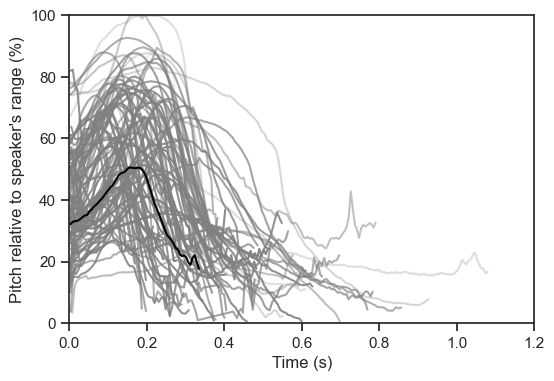

In [165]:
from matplotlib import pyplot as plt
from scipy.interpolate import make_interp_spline
import os
import pandas as pd
import glob
import math

dir="../Results/RisingFallingOhPitchRelativeToRangeCSV/"

pitchdata = pd.read_csv("../Results/ohRisingFallingInfo.csv")

ranking = pd.read_csv("../Results/similarityRanking.csv")
# get maximum distance, and scale everything else relative to that
max_distance = ranking['distances'].max()

plt.figure(figsize=(6,4))
plt.rcParams.update({'font.size': 12})
plt.axis([0, 1.2, 0, 100])

# reverse the dataframe so that the prototypical case is drawn last (= on top)
ranking_reversed = ranking[::-1]

for ind in ranking_reversed.index:
    token=ranking['unit.id.2'][ind]
    distance=ranking['distances'][ind]

    # work out red and blue values based on distance
    rval=1-(((100/max_distance)*distance)/100)
    bval=1-rval

    # work our alpha value based on distance
    aval=1-(((100/max_distance)*distance)/100)

    # default alpha value
    alpha=0.8
    # default colour
    color=(0.5,0.5,0.5)

    # draw prototypical case in solid black
    if distance==0:
        alpha=1
        color='black'

    # open the .csv file for the token
    file = os.path.join(dir, token + '.csv')
    data = pd.read_csv(file)

    x = data['time']
    y = data['pitch']
    plt.plot(x, y, alpha=aval, color=color)
    
    # alternatively, plot a smoothed version
    #X_Y_Spline = make_interp_spline(x, y)
    #X_ = np.linspace(x.min(), x.max(), 10)
    #Y_ = X_Y_Spline(X_)
    #plt.plot(X_, Y_, alpha=alpha, color=(rval,0,bval))

plt.xlabel("Time (s)")
plt.ylabel("Pitch relative to speaker's range (%)")
plt.savefig(plotDir + "allData.png", format="png", dpi=300, bbox_inches='tight')
plt.show

In [166]:
import pandas as pd 
import numpy as np

file='../Results/similarityRanking.csv'

# create a new dataframe  
sim = pd.read_csv(file)

# rename columns
sim = sim.rename(columns={'Unnamed: 0': 'Rank', 'distances': 'Distance', 'unit.id.2': 'Token'})
# caption
caption="All cases, ranked in order of distance from the prototypical case at rank 0"
label="tab:allcases"

latex = sim.style.hide(axis="index").format(precision=2).to_latex(position_float='centering',
                                                                  column_format='rrr',
                                                                  position="H",
                                                                  caption=caption,
                                                                  siunitx=True,
                                                                  label=label,
                                                                  hrules=True,
                                                                  )

print(latex, file=open("../LaTeX/casesRanked.tex", 'w'))

In [167]:
%%bash
# make another version of the table with a break in the middle to simulate two columns
f=../LaTeX/casesRanked.tex
# break the file after case number 46
line=$(grep -n "^46 &" $f | cut -d : -f 1)
# alter the code and write it to a new file
sed "$line i \\\\\end{tabular}\\\\\quad \\\\\begin{tabular}{rrr} \\\\\XYZoprule{Rank} & {Distance} & {Token} \\\\\\\\\\ \\\\\midrule" $f | sed 's/XYZ/t/' | sed 's/\\bottomrule/~\\\\/' > ../LaTeX/casesRankedSplit.tex

In [168]:
%%bash
# make audio files
f=../Results/similarityRanking.csv

d=../Audio/Chains
t=tmpsil.wav # temporary file for padding with silence
# make a silent file
ffmpeg -y -f lavfi -i anullsrc=r=8000:cl=mono -t 0.25 -q:a 9 $t >/dev/null 2>&1

# get lists of files
pt_list=$(head -2 $f | tail -1 | cut -d, -f 3 | sed 's|"||g')
mt_list=$(head -7 $f | tail -5 | cut -d, -f 3 | sed 's|"||g')
lt_list=$(tail -5 $f | cut -d, -f 3 | sed 's|"||g')
lt_list=$(tac <<< $lt_list)

pt=($pt_list)
mt=($mt_list)
lt=($lt_list)

makept=$(
    echo -n "sox "
    for p in "${pt[@]}"
    do
        echo -n "$t ../Audio/Tokens/$p.wav " 
    done
    echo -n $t $d/proto-typical.wav
    )

makemt=$(
    echo -n "sox "
    for m in "${mt[@]}"
    do
        echo -n "$t ../Audio/Tokens/$m.wav " 
    done
    echo -n tmpsil.wav $d/most-typical.wav
    )

makelt=$(
    echo -n "sox "
    for l in "${lt[@]}"
    do
        echo -n "$t ../Audio/Tokens/$l.wav " 
    done
    echo -n tmpsil.wav $d/least-typical.wav
    )

$makept
$makemt
$makelt

rm $t